In [6]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from os import listdir
from os.path import isfile, join


In [7]:
print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

Your uproot version:  5.0.10
Info: uproot 4+ is recommended.


In [12]:
#give path to simulation output .root file
sim_out_path='/home/mfedkevych/Work/LZ/Simulations/AmBe_Mariia_GeSim_exact_geometry_remote_position/No_outer_W_capsule/full_spectrum/simulation_output/'
files_in_folder = [f for f in listdir (sim_out_path) if isfile(join(sim_out_path, f))]
files_in_folder.sort()

TrueEnergy=None
for file in files_in_folder:
    if "AmBe" in file:
        f = uproot.open(sim_out_path+file)
        f.classnames()
        f['tT1;1'].show()
        t = f['tT1;1']
        rq = t.arrays(library='np')
        if TrueEnergy is not None:
            TrueEnergy=np.append(TrueEnergy,rq['TrueEnergy'])
            GenEnergy=np.append(GenEnergy, rq['GenEnergy'])
        else:
            TrueEnergy=rq['TrueEnergy']
            GenEnergy=rq['GenEnergy']



name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Energy               | float                    | AsDtype('>f4')
TrueEnergy           | float                    | AsDtype('>f4')
GenEnergy            | float                    | AsDtype('>f4')
GenX                 | float                    | AsDtype('>f4')
GenY                 | float                    | AsDtype('>f4')
GenZ                 | float                    | AsDtype('>f4')


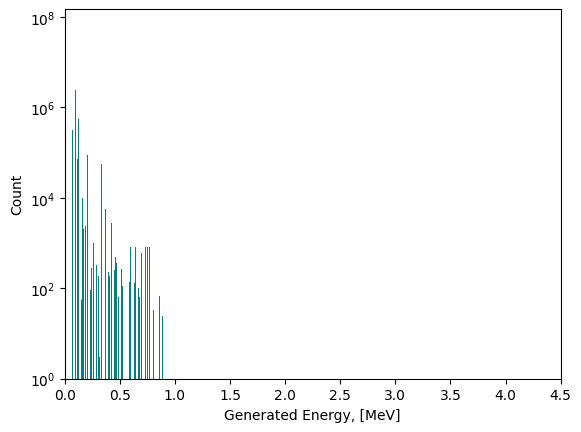

In [13]:
#plot primary gammas energy spectrum
plt.hist(GenEnergy, bins=1000, range=(0.0, 4.5), color='teal')
plt.xlabel('Generated Energy, [MeV]')
plt.ylabel('Count')
#plt.yscale("log")
plt.xlim(0,4.5)
plt.ylim(1,1.5e8)
plt.yscale('log')
plt.show()

/tmp/ipykernel_8187/2695181297.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


5866


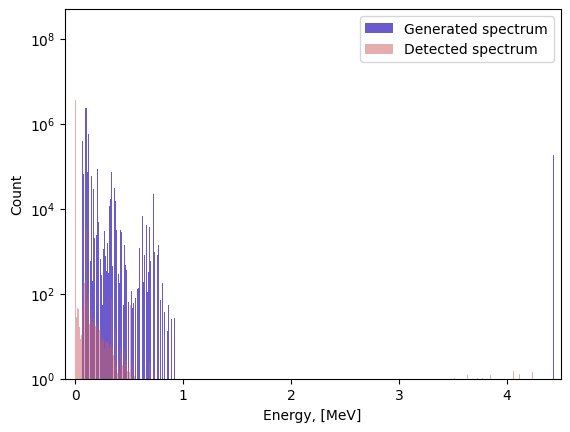

6512497.2873279005
6512496


In [14]:
#plot primary and gaussian-smoothed detected gammas' energy spectrum

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d


# Create the histogram
bin_counts, bin_edges, _ = plt.hist(TrueEnergy, bins=5764, edgecolor='blue', alpha=0)

plt.xlim(-0.1, 4.5)


# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the bin width
bin_width = bin_edges[1] - bin_edges[0]

# Extend the original histogram with empty bins on the right
num_extra_bins = 100  # You can adjust the number of empty bins here
extended_bin_edges = np.linspace(bin_edges[-1], bin_edges[-1] + (num_extra_bins + 1) * bin_width, num=num_extra_bins + 1)
extended_bin_centers = (extended_bin_edges[:-1] + extended_bin_edges[1:]) / 2
extended_bin_counts = np.zeros(num_extra_bins)

# Concatenate the original and extended histogram
full_bin_centers = np.concatenate((bin_centers, extended_bin_centers))
full_bin_counts = np.concatenate((bin_counts, extended_bin_counts))

# Initialize an array for smoothed counts
smoothed_counts = np.zeros_like(full_bin_counts)

# Iterate over bin centers and apply Gaussian smoothing to the extended histogram
p0 = 1.218
p1 = 0.0003626

for i, center in enumerate(full_bin_centers):
    sigma = center * p1 + p0
    smoothed_counts[i] = gaussian_filter1d(full_bin_counts, sigma)[i]

# Plot the smoothed histogram (including the extended bins)
plt.hist(GenEnergy, bins=500, edgecolor=None, color='slateblue', alpha=1, label='Generated spectrum')
full_bin_counts, full_bin_edges, _ = plt.hist(full_bin_centers, bins=np.concatenate((bin_edges, extended_bin_edges)), weights=smoothed_counts, edgecolor=None, color='indianred', alpha=0.5, label='Detected spectrum')
print(len(np.concatenate((bin_edges, extended_bin_edges))))
plt.legend()

plt.xlabel('Energy, [MeV]')
plt.ylabel('Count')
plt.ylim(1, 5e8)
plt.yscale('log')
plt.show()

# Compute the sum over all bins in the smoothed histogram
total_sum = np.sum(smoothed_counts)

#print(total_sum)
#print(TrueEnergy.shape[0])

# Compute the sum over all bins in the original histogram

full_bin_counts = full_bin_counts[:-1]

# Save the arrays to a file
np.savez("simulated_spectrum_data.npz", energies=full_bin_centers, counts=full_bin_counts)

    